In [7]:
from sklearn.linear_model import Perceptron  # sklearn中感知机实现
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from typing import List
from sklearn.model_selection import KFold

# 感知机
感知机(perceptron)是一种二分类线性模型，感知机通过训练数据找到一个超平面将两个类别分开。其中超平面是在二维特征向量下是一条直线，三维特征向量下是一个平面。这个超平面也称为决策边界。

感知机是对于每个特征赋予不同的权重(weight)，并且找到一个阈值(threshold)：
- 当$w_1*x_1+w_2*x_2+...+w_n*x_n>threshold$时，认为特征是阳性的
- 当$w_1*x_1+w_2*x_2+...+w_n*x_n<threshold$时，认为特征是阴性的

因此感知机学习到的模型是

$$d(x_1, x_2, ..., x_n)=w_1x_1+w_2x_2+...+w_nx_n+b=0$$

定义两个列向量，分别是权重向量和特征向量

$$\boldsymbol{w}=\begin{pmatrix}w_1\\w_2\\\vdots\\w_n\end{pmatrix},\quad
\boldsymbol{x}=\begin{pmatrix}x_1\\x_2\\\vdots\\x_n\end{pmatrix}$$

可以将上式简化为：

$$d(\boldsymbol{x})=\boldsymbol{w}\cdot\boldsymbol{x}+b$$


## 感知机的暴力算法

### 向量
$n$个有序的数$a_1,a_2,\cdots,a_n$所组成的数组称为$n$维向量，这$n$个数称为向量$n$个分量，第$i$个数$a_i$称为第$i$个分量。$n$维向量可以写成一列或者一行，分别称为列向量和行向量：
- $n$维列向量：
$$\begin{pmatrix}a_1\\a_2\\\vdots\\a_n\end{pmatrix}$$
- $n$维行向量：
$$(a_1,a_2,\cdots,a_n)\quad 或\quad \begin{pmatrix}a_1&a_2&\cdots&a_n\end{pmatrix}$$
$n$称为该向量的维度。

对于二维向量来说，就表示平面坐标系下的一个点，可以认为是原点只想该点的一条有向线段。对于三维向量来说，就是空间直角坐标系下的一个点，可以认为是原点指向该点的一条有向线段，对于更高维的向量，就没有几何意义了。

向量$u$的长度记作$||u||$

### 向量组
若干同维度的列向量（行向量）所组成的集合称为向量组，记作：
$$\mathcal{A}:\boldsymbol{a_1},\boldsymbol{a_2},...,\boldsymbol{a_m}\quad 或\quad \mathcal{A}=\{\boldsymbol{a_1},\boldsymbol{a_2},...,\boldsymbol{a_m}\}$$

### 向量空间
设$\mathcal{V}$为一向量组，如果$\mathcal{V}$非空，且$\mathcal{V}$对于向量的基本运算封闭，那么$\mathcal{V}$就是向量空间。封闭具体来说就是：
- 若$\boldsymbol{a}\in \mathcal{V},\boldsymbol{b}\in \mathcal{V}$，则$\boldsymbol{a}+\boldsymbol{b} \in \mathcal{V}$
- 若$\boldsymbol{a}\in \mathcal{V},k\in \mathbb{R}$，则$k\boldsymbol{a} \in \mathcal{V}$

向量空间必须包含零向量。

### 向量点积
向量点积（dot product）或者内积（inner product），定义为
$$\boldsymbol{x}\cdot\boldsymbol{y}=x_1y_1+\cdots+x_ny_n=\displaystyle\sum_{i=1}^{n}x_iy_i$$

其中向量$\boldsymbol{x}$和向量$\boldsymbol{y}$夹角的余弦值为：
$$cos\theta=\displaystyle\frac{\boldsymbol{x} \cdot \boldsymbol{y}}{||\boldsymbol{x}||||\boldsymbol{y}||},\quad \boldsymbol{x},\boldsymbol{y}\ne\boldsymbol{0}$$

### 法向量
对于n维空间中的超平面$\boldsymbol{w}\cdot\boldsymbol{x}+b=0$，权重向量$\boldsymbol{w}$是其法向量。法向量是与平面垂直，即法向量和超平面的夹角为$\frac{\pi}{2}$，根据向量夹角的计算公式，那么向量$\boldsymbol{w}$和超平面点积为0，由于超平面$\boldsymbol{w}\cdot\boldsymbol{x}+b=0$和超平面$\boldsymbol{w}\cdot\boldsymbol{x}=0$平行，因此$\boldsymbol{w}$是超平面$\boldsymbol{w}\cdot\boldsymbol{x}+b=0$的法向量。

对于$n$维向量空间中的向量$\boldsymbol{a}$与超平面$d(x)=\boldsymbol{w}\cdot\boldsymbol{x}+b$的关系为：
- $d(\boldsymbol{a})=\boldsymbol{w}\cdot\boldsymbol{a}+b > 0$: 在超平面法向量$\boldsymbol{w}$所指的一侧
- $d(\boldsymbol{a})=\boldsymbol{w}\cdot\boldsymbol{a}+b = 0$：在超平面上
- $d(\boldsymbol{a})=\boldsymbol{w}\cdot\boldsymbol{a}+b < 0$：在超平面的法向量$\boldsymbol{w}$所指的另外一侧

如下图:

- $\boldsymbol{a_1}$在法向量$\boldsymbol{w}$所指的一侧
- $\boldsymbol{a_2}$在超平面上
- $\boldsymbol{a_3}$在法向量$\boldsymbol{w}$所指的另外一侧

![](../resources/perceptron1.svg)

### 暴力算法
我们希望标签值为$+1$的特征向量在超平面（决策边界）的法向量$\boldsymbol{w}$指向的一侧，而标签值为$-1$的特征向量在另外一侧，那么对于分错的点有两种情况。
#### 拉近
当标签值为$+1$的特征向量$\boldsymbol{x_1}$被分错了，那么有$\boldsymbol{w}\cdot\boldsymbol{x_1}\lt0$，也就是特征向量$\boldsymbol{x_1}$和$\boldsymbol{w}$的夹角为钝角，根据向量加法的平行四边形法则，令$\boldsymbol{w_2}=\boldsymbol{w_1}+\boldsymbol{x_1}$能够将特征向量和新的$\boldsymbol{w_2}$的夹角拉近：

![](../resources/perceptron2.svg)

#### 推远
当标签值为$-1$的特征向量$\boldsymbol{x_1}$被分错了，那么有$\boldsymbol{w}\cdot\boldsymbol{x_1}\gt0$，也就是特征向量$\boldsymbol{x_1}$和$\boldsymbol{w}$的夹角为锐角，根据向量加法的平行四边形法则，令$\boldsymbol{w_2}=\boldsymbol{w_1}-\boldsymbol{x_1}$能够将特征向量和新的$\boldsymbol{w_2}$的夹角推远：

![](../resources/perceptron3.svg)

#### 算法
- 令权重$\boldsymbol{w}$和b都为0：
$$\boldsymbol{w}=0,  b=0$$
因此初始函数
$$d(\boldsymbol{x})=\boldsymbol{w}\cdot\boldsymbol{x}+b=\boldsymbol{0}\cdot\boldsymbol{x}+0$$
- 顺序遍历数据集$(\boldsymbol{x_i},y_i)$，如果发现分错，即
$$y_id(\boldsymbol{x_i})\le 0$$
则进行更正:
$$\boldsymbol{w}\leftarrow\boldsymbol{w}+y_i\boldsymbol{x_i},\quad b\leftarrow b+y_i$$
- 直至数据集全部能够正确分类


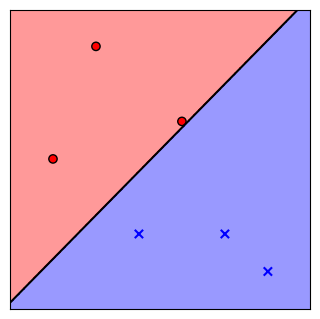

In [2]:
# 定义 d(x) 函数
def d(x, w, b):
    return np.dot(w,x)+b # np.dot 是向量的点积

def perceptron_brute_force(X: np.ndarray, y: np.ndarray) -> (np.ndarray, float):
    """感知机的暴力算法
    """
    w, b = np.array([0, 0]), 0
    is_modified = True # 记录是否有分错的点
    max_iter_num = 1000
    while is_modified: # 循环，直到没有分错的点
        is_modified = False
        for xi, yi in zip(X, y):
            # 如果有分错的
            if yi*d(xi, w, b) <= 0:
                # 更新法向量 w 和 b
                w, b = w + yi*xi, b + yi
                is_modified = True
                break
        max_iter_num -= 1
        if max_iter_num <= 0:
            raise ValueError("Linearly inseparable data set")
    return w, b


# 历史信用卡发行数据
X = np.array([[5,2], [3,2], [2,7], [1,4], [6,1], [4,5]])
y = np.array([-1, -1, 1, 1, -1, 1])

w, b = perceptron_brute_force(X, y)

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    t = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(t)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 训练 skrlearn 中的感知机，这里是为了借用该感知机的接口，便于绘制决策区域
clf = Perceptron().fit(X, y)
# 根据上面暴力实现得到的 w 和 b 来修改感知机
clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b

# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
# 坐标轴不要显示刻度
ax.set_xticks(()),ax.set_yticks(())

# 两种颜色，不同的点不同的颜色
cm = ListedColormap(('blue', 'red'))
markers = ('x', 'o')

# 决定绘制区域的大小
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# 绘制决策区域
plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)

# 绘制决策直线
lx = np.linspace(xx.min(), xx.max())
ly = - w[0] / w[1] * lx  - b / w[1]
ax.plot(lx, ly, 'k-')

# 根据类别不同，绘制不同形状的点
vmin, vmax = min(y), max(y)
for cl, m in zip(np.unique(y), markers):
    edgecolors = 'k'
    if m == 'x':
        edgecolors = None
    ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors=edgecolors, marker = m)

plt.show()

## 感知机的口袋算法

暴力算法要求数据集是线性可分的，否则迭代无法终止，而线性可分的数据集在现实中很罕见，因此提出感知机的口袋算法，能够让感知机在线性不可分的数据集上也能工作。

感知机的口袋算法在暴力算法的基础上做了如下改进：
- 指定循环次数
- 记录犯错次数，迭代过程中，$\boldsymbol{w}$和$b$是在不断更新的，对应的是不同的决策边界，记录每个决策边界的犯错次数
- 迭代结束后，返回最少犯错次数的决策边界

### 符号函数
$$\operatorname{sign}(x)=
\begin{cases}
    +1,& x \ge 0\\
    -1,& x < 0
\end{cases}
$$

将决策边界$d(\boldsymbol{x})$和符号函数$sign(x)$复合，那么分对的点，函数值为1，分错的点函数值为-1，那么决策边界的评分为
$$S=\sum_{(\boldsymbol{x_i},y_i)\in T} y_ih(\boldsymbol{x_i})$$
分数越高说明决策边界的效果越好。

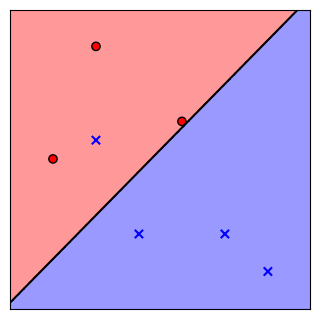

In [3]:
# 定义 sign 函数
def sign(x):
    return 1 if x >= 0 else -1

# 定义 h(x) 函数
def h(x, w, b):
    return sign(d(x, w, b))

# 计算决策边界的评分
def clf_score(X, y, w, b):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi, w, b)
    return score

# 历史信用卡发行数据，该数据不是线性可分的
X = np.array([[5,2], [3,2], [2,7], [1,4], [6,1], [4,5], [2,4.5], ])
y = np.array([-1, -1, 1, 1, -1, 1, -1, ])

def perceptron_pocket(X: np.ndarray, y: np.ndarray, epoch: int) -> (np.ndarray, float):
    """感知机的口袋算法
    """
    w, b = np.array([0, 0]), 0
    best_w, best_b = w, b
    best_cs = clf_score(X, y, best_w, best_b)
    for _ in range(epoch):
        for xi, yi in zip(X, y):
            # 如果有分错的
            if yi*d(xi, w, b) <= 0:
                # 更新法向量 w 和 b
                w, b = w + yi*xi, b + yi
                # 对新得到的决策边界进行评分
                cs = clf_score(X, y, w, b)
                # 如果更好，则进行更新
                if cs > best_cs:
                    best_cs = cs
                    best_w, best_b = w, b
                break

    w, b = best_w, best_b
    return w, b

w, b = perceptron_pocket(X, y, 10)
clf = Perceptron().fit(X, y)
clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b

# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
ax.set_xticks(()),ax.set_yticks(())

# 决定绘制区域的大小
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# 绘制决策区域
plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)

# 绘制决策直线
lx = np.linspace(xx.min(), xx.max())
ly = - w[0] / w[1] * lx  - b / w[1]
ax.plot(lx, ly, 'k-')

# 根据类别不同，绘制不同形状的点
vmin, vmax = min(y), max(y)
for cl, m in zip(np.unique(y), markers):
    edgecolors='k'
    if m == 'x':
        edgecolors = None 
    ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, 
             vmin = vmin, vmax = vmax, cmap=cm, edgecolors=edgecolors, marker = m)

plt.show()

## 机器学习的流程

### 超参数
在感知机的口袋算法中，需要手动设置循环次数，在机器学习中称为epoch，每个epoch都会过一遍数据集。

调整超参数有时候是一门玄学问题，如果调整不当，可能会让模型出现欠拟合（underfitting）或者过拟合（overfitting）。
- 欠拟合：在训练集上模型的准确率很低
- 过拟合：在训练集上模型的准确率还可以但是在验证集上准确率很低

### 流程

1. 将数据集分为三部分
    - 训练集：用于机器学习的训练阶段，获取到合适的模型
    - 验证集：验证模型是否有欠拟合或者过拟合来调整超参数
    - 测试集：验证最终训练的模型效果
2. 在训练集中学习模型参数，比如感知机中的$\boldsymbol{w}$和$b$
3. 在验证集合上调整超参数，比如感知机的暴力算法的epoch
4. 在新的超参数下重复步骤2，3，直至模型效果比较满意
5. 最后在测试集上检验模型的最终效果

在验证集上调整超参数，可以避免模型的过拟合（overfitting）。

下面针对安德森鸢尾花卉数据集的训练过程中，epoch从100提高到500后，模型在验证集的准确率还下降了，这说明产生了过拟合问题。

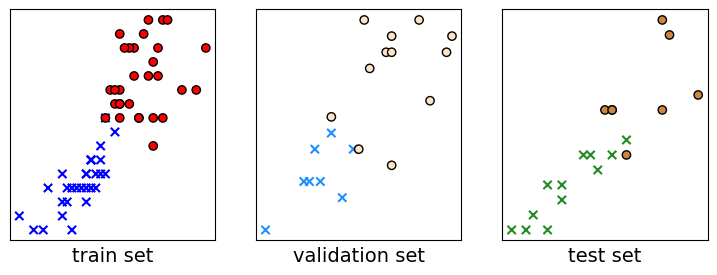

In [4]:
# 载入安德森鸢尾花卉数据集, 150个sample，每个sample包含4个特征，总共有三种类别
iris = datasets.load_iris()
# 取后面100个数据，并且只取最后两个特征，以及取出对应的类别
sampleNumber = 100
X = iris.data[50:50+sampleNumber, [2,3]]
# iris 数据集的类别是0, 1, 2，为了运用我们实现的感知机算法，这里将后两个类别改为-1, 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)

# 借助 train_test_split 进行随机分割，按照 6 : 2 : 2 的比例划分为三种数据集
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=42)

# 创建并设置排的三个subfigure
fig, axes = plt.subplots(figsize = (9, 3), nrows=1, ncols=3)
cmaps = (ListedColormap(('blue', 'red')), 
         ListedColormap(('dodgerblue', 'bisque')), 
         ListedColormap(('forestgreen', 'peru')))
markers, xlabels  = ('x', 'o'), ('train set', 'validation set', 'test set')
Xs, ys = (X_train, X_val, X_test), (y_train, y_val, y_test)
for ax, xlabel, cm, X, y in zip(axes.flat, xlabels, cmaps, Xs, ys):
    ax.set(xticks=[], yticks=[])
    ax.set_xlabel(xlabel)

    vmin, vmax = min(y), max(y)
    for cl, m in zip(np.unique(y), markers):
        edgecolors = 'k'
        if m == 'x':
            edgecolors = None
        ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=y[y==cl], alpha=1, 
                   vmin = vmin, vmax = vmax, cmap=cm, edgecolors=edgecolors, marker = m)

plt.show()

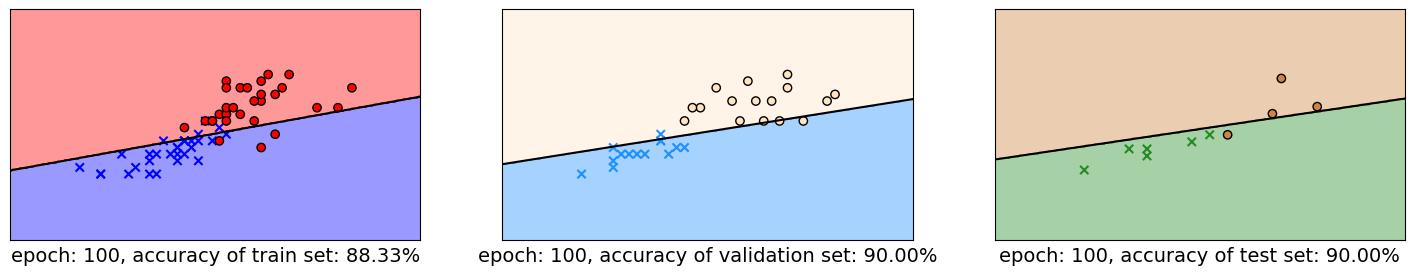

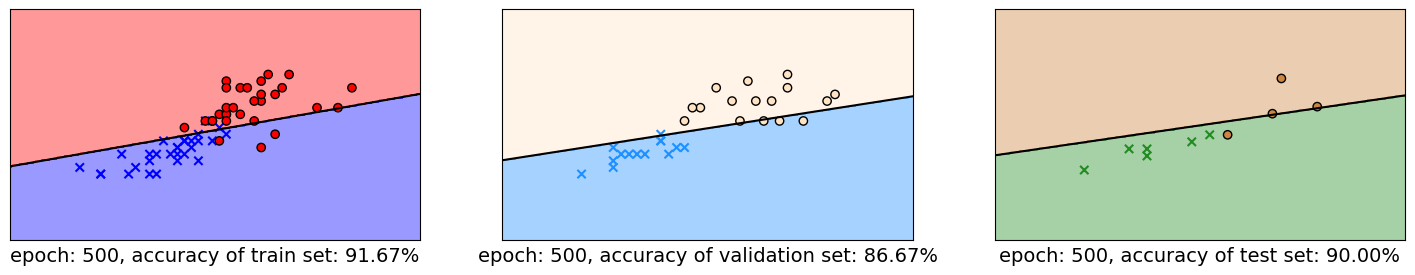

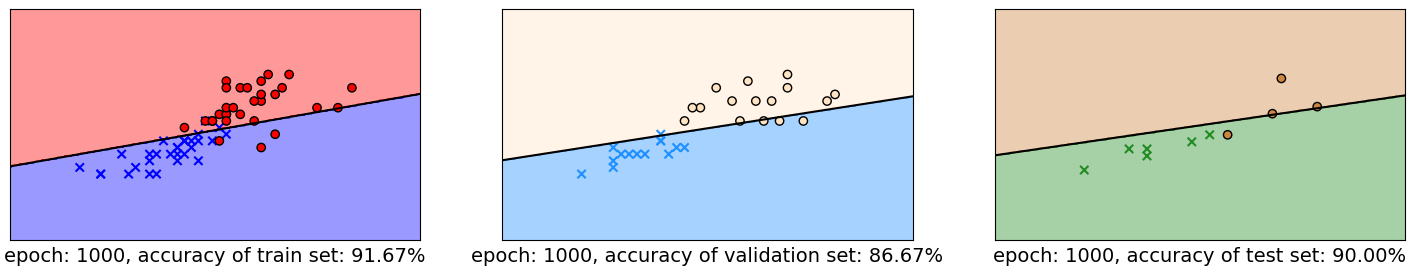

In [5]:
def train_iris(proportion: List[float], epoch: int):
    if len(proportion) != 3:
        raise ValueError("Split data set to three subset")
    total_sum = sum(proportion)
    test_ratio = proportion[2] / total_sum
    validation_ratio = proportion[1] / (proportion[0] + proportion[1])
    iris = datasets.load_iris()
    sample_number = 100
    X = iris.data[50:50+sample_number, [2,3]]
    y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)
    X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=validation_ratio, random_state=42)
    w, b = perceptron_pocket(X_train, y_train, epoch)
    best_cs = clf_score(X_train, y_train, w, b)
    train_accuracy = 1 - (len(X_train) - best_cs)/2/len(X_train)
    val_accuracy = 1 - (len(X_val) - clf_score(X_val, y_val, w, b))/2/len(X_val)
    test_accuracy = 1 - (len(X_test) - clf_score(X_test, y_test, w, b))/2/len(X_test)

    clf = Perceptron(max_iter=40, tol=10).fit(X_train, y_train)
    clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b
    # 绘制在train set\validation set\test set的图像
    fig, axes = plt.subplots(figsize=(18, 3), nrows=1, ncols=3)
    # fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.1)

    cmaps = (ListedColormap(('blue', 'red')), 
             ListedColormap(('dodgerblue', 'bisque')),
             ListedColormap(('forestgreen', 'peru')))
    markers = ('x', 'o')
    xlabels = (r"epoch: {}, accuracy of train set: {:.2%}".format(epoch, train_accuracy),
              r"epoch: {}, accuracy of validation set: {:.2%}".format(epoch, val_accuracy),
              r"epoch: {}, accuracy of test set: {:.2%}".format(epoch, test_accuracy))

    Xs, ys = (X_train, X_val, X_test), (y_train, y_val, y_test)
    for ax, xlabel, cm, X, y in zip(axes.flat, xlabels, cmaps, Xs, ys):
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1)
        plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)
        ax.set(xticks=[], yticks=[])
        ax.set_xlim(xx.min(), xx.max()), ax.set_ylim(yy.min(), yy.max()) 
        ax.set_xlabel(xlabel)

        vmin, vmax = min(y), max(y)
        for cl, m in zip(np.unique(y), markers):
            edgecolors = 'k'
            if m == 'x':
                edgecolors = None
            ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, 
                       vmin = vmin, vmax = vmax, cmap=cm, edgecolors=edgecolors, marker = m)

        # 绘制决策直线
        w1, w2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0]
        lx = np.linspace(xx.min(), xx.max())
        ly = - w1 / w2 * lx  - b / w2
        ax.plot(lx, ly, 'k-')

epochs = [100, 500, 1000]
for epoch in epochs:
    train_iris([6, 3, 1], epoch)
plt.show()

## K折交叉验证

K折交叉验证（K-fold Corss Validation）是一种充分利用数据集参与到训练中的一种方法。使用K折交叉验证的学习流程如下：

1. 将数据集分成两部分，训练集和测试集
2. 设置超参数，比如epoch=100
3. 将训练集随机平均分成k份，依次选择其中一份作为验证集，剩余的仍然作为训练集，由于总共有k份数据，因此总共需要训练k次，每次称为某一折
4. 计算在某一折上训练后在验证集上的准确率
5. 完成k折的训练和准确率计算，计算出来的k个准确率的平均值作为该超参数下的准确率
6. 调整超参数，重复3\4\5\6，直到找到平均准确率最高的超参数
7. 使用找到的超参数在整个训练集上训练得到模型，并在测试集上校验模型效果

![](../resources/perceptron4.svg)


epochs = 100, k=10, accurancy of validation set: 91.25%。
epochs = 200, k=10, accurancy of validation set: 91.25%。
epochs = 300, k=10, accurancy of validation set: 91.25%。
epochs = 400, k=10, accurancy of validation set: 88.75%。


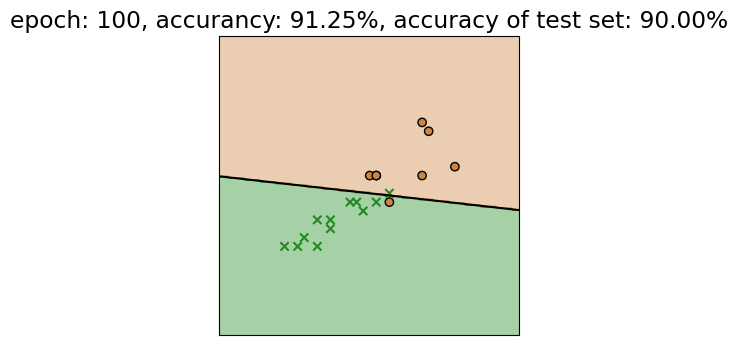

In [6]:
def train_iris_by_k_fold_cross_validation(k: int, epochs: List[int], proportion: List[float]):
    if len(proportion) != 2:
        raise ValueError("Split dataset into two subset")
    total_sum = sum(proportion)
    test_ratio = proportion[1] / total_sum
    iris = datasets.load_iris()
    sample_number = 100
    X = iris.data[50:50+sample_number, [2,3]]
    y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)
    X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
    best_epoch = -1
    best_accuracy = 0
    for epoch in epochs:
        kf = KFold(n_splits=k, random_state=42, shuffle=True)
        val_accuracy = 0
        for idx, (train, val) in zip(range(k), kf.split(X_tv)):
            X_train, y_train, X_val, y_val = X_tv[train], y_tv[train], X_tv[val], y_tv[val]
            w, b = perceptron_pocket(X_train, y_train, epoch)
            val_accuracy += 1 - (len(X_val) - clf_score(X_val, y_val, w, b))/2/len(X_val)
        if val_accuracy/k > best_accuracy:
            best_accuracy = val_accuracy/k
            best_epoch = epoch
        print(r'epochs = {}, k={}, accurancy of validation set: {:.2%}。'.format(epoch, k, val_accuracy / k))
    # 在准确率最高的超参数下训练
    w, b = perceptron_pocket(X_tv, y_tv, best_epoch)
    test_accuracy = 1 - (len(X_test) - clf_score(X_test, y_test, w, b))/2/len(X_test)
    # 设置画布和坐标系
    fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
    fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
    ax.set_xticks(()),ax.set_yticks(())

    # 决定绘制区域的大小
    X0, X1 = X_test[:, 0], X_test[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    clf = Perceptron(max_iter=40, tol=10).fit(X_train, y_train)
    clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b
    cm = ListedColormap(('forestgreen', 'peru'))
    # 绘制决策区域
    plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)
    ax.set_title(f"epoch: {best_epoch}, accurancy: {best_accuracy:.2%}, accuracy of test set: {test_accuracy:.2%}")

    # 绘制决策直线
    w1, w2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0]
    lx = np.linspace(xx.min(), xx.max())
    ly = - w1 / w2 * lx  - b / w2
    ax.plot(lx, ly, 'k-') 

    # 根据类别不同，绘制不同形状的点
    vmin, vmax = min(y_test), max(y_test)
    for cl, m in zip(np.unique(y_test), markers):
        edgecolors='k'
        if m == 'x':
            edgecolors = None 
        ax.scatter(x=X0[y_test==cl], y=X1[y_test==cl], c=y_test[y_test==cl], alpha=1, 
                vmin = vmin, vmax = vmax, cmap=cm, edgecolors=edgecolors, marker = m)

    
train_iris_by_k_fold_cross_validation(10, list(range(100, 500, 100)), [8, 2])
plt.show()